### Intro to data structures¶
We’ll start with a quick, non-comprehensive overview of the fundamental data structures in pandas to get you started. The fundamental behavior about data types, indexing, and axis labeling / alignment apply across all of the objects. To get started, import NumPy and load pandas into your namespace:

In [1]:
import pandas as pd
import numpy as np

Here is a basic tenet to keep in mind: data alignment is intrinsic. The link between labels and data will not be broken unless done so explicitly by you.

We’ll give a brief intro to the data structures, then consider all of the broad categories of functionality and methods in separate sections.



### Series
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

In [2]:
data = [1,2,3,4,5]
index = ["a","b","c","d","e"]
s = pd.Series(data, index)
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

Here, data can be many different things:

    a Python dict

    an ndarray

    a scalar value (like 5)

The passed index is a list of axis labels. Thus, this separates into a few cases depending on what data is:

From ndarray

    If data is an ndarray, index must be the same length as data. If no index is passed, one will be created having values [0, ..., len(data) - 1].

In [3]:
s = pd.Series(np.random.randn(3), index=['a','b','c'])
s

a    0.019111
b   -0.994743
c   -0.665973
dtype: float64

In [4]:
s.index

Index(['a', 'b', 'c'], dtype='object')

In [5]:
s = pd.Series(np.random.randn(5))
s

0   -0.226490
1    0.346565
2    0.152154
3    0.570580
4   -0.250083
dtype: float64

#### Note :

pandas supports non-unique index values. If an operation that does not support duplicate index values is attempted, an exception will be raised at that time. The reason for being lazy is nearly all performance-based (there are many instances in computations, like parts of GroupBy, where the index is not used).

#### From dict

Series can be instantiated from dicts:

In [6]:
s1 = {'b':1,'a':3,'c':10}
s = pd.Series(s1)
s

b     1
a     3
c    10
dtype: int64

#### Note:
When the data is a dict, and an index is not passed, the Series index will be ordered by the dict’s insertion order, if you’re using Python version >= 3.6 and Pandas version >= 0.23.

If you’re using Python < 3.6 or Pandas < 0.23, and an index is not passed, the Series index will be the lexically ordered list of dict keys.

In the example above, if you were on a Python version lower than 3.6 or a Pandas version lower than 0.23, the Series would be ordered by the lexical order of the dict keys (i.e. ['a', 'b', 'c'] rather than ['b', 'a', 'c']).

If an index is passed, the values in data corresponding to the labels in the index will be pulled out.

In [7]:
d = {'a':0.,'b':9,'c':7}
s = pd.Series(d)
s

a    0.0
b    9.0
c    7.0
dtype: float64

In [8]:
# explicitly we can change index
s = pd.Series(s, index=['c','b','d','a'])
s

c    7.0
b    9.0
d    NaN
a    0.0
dtype: float64

#### Note:
NaN (not a number) is the standard missing data marker used in pandas.

From scalar value

If data is a scalar value, an index must be provided. The value will be repeated to match the length of inde

In [9]:
a = pd.Series(5, index=['a','s','d','c','b'])
a

a    5
s    5
d    5
c    5
b    5
dtype: int64

### Series is ndarray-like
Series acts very similarly to a ndarray, and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

In [10]:
data = {'a':1,'b':2,'c':3,'d':4,'e':5}
a = pd.Series(data)
a

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [11]:
a[2]

3

In [12]:
a[:3]

a    1
b    2
c    3
dtype: int64

In [13]:
a[a > a.median()]

d    4
e    5
dtype: int64

In [14]:
a[[2,3,4]]

c    3
d    4
e    5
dtype: int64

In [15]:
np.exp(a)

a      2.718282
b      7.389056
c     20.085537
d     54.598150
e    148.413159
dtype: float64

Like a NumPy array, a pandas Series has a dtype.

In [16]:
a.dtypes

dtype('int64')

This is often a NumPy dtype. However, pandas and 3rd-party libraries extend NumPy’s type system in a few places, in which case the dtype would be an ExtensionDtype. Some examples within pandas are Categorical data and Nullable integer data type. See dtypes for more.

If you need the actual array backing a Series, use Series.array.

In [17]:
a1 = a.array
a1

<PandasArray>
[1, 2, 3, 4, 5]
Length: 5, dtype: int64

In [18]:
type(a1)

pandas.core.arrays.numpy_.PandasArray

Accessing the array can be useful when you need to do some operation without the index (to disable automatic alignment, for example).

Series.array will always be an ExtensionArray. Briefly, an ExtensionArray is a thin wrapper around one or more concrete arrays like a numpy.ndarray. Pandas knows how to take an ExtensionArray and store it in a Series or a column of a DataFrame. See dtypes for more.

While Series is ndarray-like, if you need an actual ndarray, then use Series.to_numpy().

In [19]:
a2 = a.to_numpy()
a2

array([1, 2, 3, 4, 5])

Even if the Series is backed by a ExtensionArray, Series.to_numpy() will return a NumPy ndarray.

### Series is dict-like
A Series is like a fixed-size dict in that you can get and set values by index label:

In [20]:
a

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [21]:
a['a']

1

In [22]:
a['e'] == 5

True

In [23]:
a['b'] =11
a

a     1
b    11
c     3
d     4
e     5
dtype: int64

In [24]:
'j' in a

False

In [25]:
'a' in a

True

If a label is not contained, an exception is raised:

In [26]:
a['k']

KeyError: 'k'

Using the get method, a missing label will return None or specified default:



In [27]:
a.get('f')

In [28]:
a.get('g', default="Not Found")

'Not Found'

Vectorized operations and label alignment with Series
When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with Series in pandas. Series can also be passed into most NumPy methods expecting an ndarray.

In [29]:
a

a     1
b    11
c     3
d     4
e     5
dtype: int64

In [30]:
a + 1

a     2
b    12
c     4
d     5
e     6
dtype: int64

In [31]:
a * a

a      1
b    121
c      9
d     16
e     25
dtype: int64

In [32]:
a / 4

a    0.25
b    2.75
c    0.75
d    1.00
e    1.25
dtype: float64

In [33]:
np.exp(a)

a        2.718282
b    59874.141715
c       20.085537
d       54.598150
e      148.413159
dtype: float64

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [34]:
a

a     1
b    11
c     3
d     4
e     5
dtype: int64

In [35]:
a['e'] = np.nan

In [36]:
a

a     1.0
b    11.0
c     3.0
d     4.0
e     NaN
dtype: float64

In [37]:
a['a'] + a['e']


nan

The result of an operation between unaligned Series will have the union of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing NaN. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research. The integrated data alignment features of the pandas data structures set pandas apart from the majority of related tools for working with labele

In general, we chose to make the default result of operations between differently indexed objects yield the union of the indexes in order to avoid loss of information. Having an index label, though the data is missing, is typically important information as part of a computation. You of course have the option of dropping labels with missing data via the dropna function.



### Name attribute
Series can also have a name attribute:

In [38]:
a = pd.Series(np.random.randn(5), name="Neil")
a

0   -0.753129
1   -1.151823
2    0.770591
3    1.180552
4    1.213819
Name: Neil, dtype: float64

In [39]:
a.name

'Neil'

The Series name will be assigned automatically in many cases, in particular when taking 1D slices of DataFrame as you will see below.

You can rename a Series with the pandas.Series.rename() method.

In [40]:
a.rename("Shruti", inplace=True) # if we do not put inplace as true then change will not appear

0   -0.753129
1   -1.151823
2    0.770591
3    1.180552
4    1.213819
Name: Shruti, dtype: float64

In [41]:
a.name

'Shruti'

### DataFrame
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

1. Dict of 1D ndarrays, lists, dicts, or Series

2. 2-D numpy.ndarray

3. Structured or record ndarray

4. A Series

5. Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

#### Note:
When the data is a dict, and columns is not specified, the DataFrame columns will be ordered by the dict’s insertion order, if you are using Python version >= 3.6 and Pandas >= 0.23.

If you are using Python < 3.6 or Pandas < 0.23, and columns is not specified, the DataFrame columns will be the lexically ordered list of dict keys.



### From dict of Series or dicts
The resulting index will be the union of the indexes of the various Series. If there are any nested dicts, these will first be converted to Series. If no columns are passed, the columns will be the ordered list of dict keys.

In [42]:
d = {'one': pd.Series([1,2,3], index=['a','b','c']),
    'two': pd.Series([5,6,7,8], index=['a','b','c','d'])}

df = pd.DataFrame(d)
df

,one,two
a,1.0,5
b,2.0,6
c,3.0,7
d,NaN,8


The row and column labels can be accessed respectively by accessing the index and columns attributes:



In [43]:
df.columns

Index(['one', 'two'], dtype='object')

In [44]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [45]:
df = pd.DataFrame(d, index=['d','b','c'])
df

,one,two
d,NaN,8
b,2.0,6
c,3.0,7


In [46]:
df = pd.DataFrame(d, index=['a','b','c'], columns=['one', 'two', 'three'])
df

,one,two,three
a,1,5,NaN
b,2,6,NaN
c,3,7,NaN


### From dict of ndarrays/lists
The ndarrays must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length.

In [47]:
d = {'one': [1,2,3,4],
    'two': [5,6,7,8]}

df = pd.DataFrame(d)
df

,one,two
0,1,5
1,2,6
2,3,7
3,4,8


In [48]:
df = pd.DataFrame(d, index=['a','b','c','d'])
df

,one,two
a,1,5
b,2,6
c,3,7
d,4,8


### From structured or record array
This case is handled identically to a dict of arrays.

In [49]:
data = np.zeros(2, dtype=[('one','i4'),('two','f4'),('three','a10')])

In [50]:
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('one', '<i4'), ('two', '<f4'), ('three', 'S10')])

In [51]:
data[:] = [(1,2,'Hello'),(5,6,'Word')]

In [52]:
data

array([(1, 2., b'Hello'), (5, 6., b'Word')],
      dtype=[('one', '<i4'), ('two', '<f4'), ('three', 'S10')])

In [53]:
df = pd.DataFrame(data)

In [54]:
df

,one,two,three
0,1,2.0,b'Hello'
1,5,6.0,b'Word'


In [55]:
df = pd.DataFrame(data, index=['a','b'], columns=['three','one','two'])
df

,three,one,two
a,b'Hello',1,2.0
b,b'Word',5,6.0


### From a list of dicts

In [56]:
d = [{'a':1,'b':2,'c':3},{'a':5,'b':6,'c':7,'d':8}]
d

[{'a': 1, 'b': 2, 'c': 3}, {'a': 5, 'b': 6, 'c': 7, 'd': 8}]

In [57]:
df = pd.DataFrame(d)
df

,a,b,c,d
0,1,2,3,NaN
1,5,6,7,8.0


In [58]:
df = pd.DataFrame(d, index=['first','second'])
df

,a,b,c,d
first,1,2,3,NaN
second,5,6,7,8.0


In [59]:
df = pd.DataFrame(d, columns=['a','b'])
df

,a,b
0,1,2
1,5,6


### From a dict of tuples
You can automatically create a MultiIndexed frame by passing a tuples dictionary.

In [60]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
              ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
              ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
              ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
              ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

### Alternate constructors
DataFrame.from_dict

DataFrame.from_dict takes a dict of dicts or a dict of array-like sequences and returns a DataFrame. It operates like the DataFrame constructor except for the orient parameter which is 'columns' by default, but which can be set to 'index' in order to use the dict keys as row labels.

In [61]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))


,A,B
0,1,4
1,2,5
2,3,6


If you pass orient='index', the keys will be the row labels. In this case, you can also pass the desired column names:



In [62]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]),
                       orient='index', columns=['one', 'two', 'three'])

,one,two,three
A,1,2,3
B,4,5,6


### DataFrame.from_records

DataFrame.from_records takes a list of tuples or an ndarray with structured dtype. It works analogously to the normal DataFrame constructor, except that the resulting DataFrame index may be a specific field of the structured dtype. For example

In [63]:
data = np.zeros(2, dtype=[('A','i4'),('B','f8'),('C','a10')])
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f8'), ('C', 'S10')])

In [64]:
data[:] = [(1,2,'Hello'),(3,4,'Word')]
data

array([(1, 2., b'Hello'), (3, 4., b'Word')],
      dtype=[('A', '<i4'), ('B', '<f8'), ('C', 'S10')])

In [65]:
df = pd.DataFrame.from_records(data, index='C')
df

,A,B
C,,
b'Hello',1,2.0
b'Word',3,4.0


### Column selection, addition, deletion
You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [66]:
d = {'one':[1,2,3,4],
    'two':[5,6,7,8]}
df = pd.DataFrame(d)
df

,one,two
0,1,5
1,2,6
2,3,7
3,4,8


In [67]:
df['one']

0    1
1    2
2    3
3    4
Name: one, dtype: int64

In [68]:
df['three'] = df['one']*5
df

,one,two,three
0,1,5,5
1,2,6,10
2,3,7,15
3,4,8,20


In [69]:
df['flag'] = df['one'] > 2
df

,one,two,three,flag
0,1,5,5,False
1,2,6,10,False
2,3,7,15,True
3,4,8,20,True


Columns can be deleted or popped like with a dict:



In [70]:
del df['one']

In [71]:
df

,two,three,flag
0,5,5,False
1,6,10,False
2,7,15,True
3,8,20,True


In [72]:
flag = df.pop('flag')
flag

0    False
1    False
2     True
3     True
Name: flag, dtype: bool

In [73]:
df

,two,three
0,5,5
1,6,10
2,7,15
3,8,20


When inserting a scalar value, it will naturally be propagated to fill the column:



In [74]:
df['bar'] = 'foo'

In [75]:
df

,two,three,bar
0,5,5,foo
1,6,10,foo
2,7,15,foo
3,8,20,foo


When inserting a Series that does not have the same index as the DataFrame, it will be conformed to the DataFrame’s index:



In [76]:
df['one_trunc'] = df['two'][:2]
df

,two,three,bar,one_trunc
0,5,5,foo,5.0
1,6,10,foo,6.0
2,7,15,foo,NaN
3,8,20,foo,NaN


You can insert raw ndarrays but their length must match the length of the DataFrame’s index.

By default, columns get inserted at the end. The insert function is available to insert at a particular location in the columns:

In [77]:
df.insert(1, 'shurti',df['three'])
df

,two,shurti,three,bar,one_trunc
0,5,5,5,foo,5.0
1,6,10,10,foo,6.0
2,7,15,15,foo,NaN
3,8,20,20,foo,NaN


### Assigning new columns in method chains
Inspired by dplyr’s mutate verb, DataFrame has an assign() method that allows you to easily create new columns that are potentially derived from existing columns.

In [78]:
iris = pd.read_csv('data/iris.csv')

In [79]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [80]:
iris_assign = iris.assign(sepal_ratio=iris['sepal_length']/iris['sepal_width'])
iris_assign.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,1.457143
1,4.9,3.0,1.4,0.2,setosa,1.633333
2,4.7,3.2,1.3,0.2,setosa,1.468750
3,4.6,3.1,1.5,0.2,setosa,1.483871
4,5.0,3.6,1.4,0.2,setosa,1.388889


In the example above, we inserted a precomputed value. We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to.

In [81]:
iris_assign_bylambda = iris.assign(petal_ratio = lambda x: x['petal_length']/x['petal_width'])
iris_assign_bylambda.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_ratio
0,5.1,3.5,1.4,0.2,setosa,7.0
1,4.9,3.0,1.4,0.2,setosa,7.0
2,4.7,3.2,1.3,0.2,setosa,6.5
3,4.6,3.1,1.5,0.2,setosa,7.5
4,5.0,3.6,1.4,0.2,setosa,7.0


assign always returns a copy of the data, leaving the original DataFrame untouched.

Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using assign in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

In [82]:
iris_sepal_petal_ratio = iris.query('sepal_length > 5').assign(Sepal_ratio = lambda x: x['sepal_length']/x['sepal_width'], \
        Petal_ratio = lambda x: x['petal_length']/x['petal_width'])


In [83]:
iris_sepal_petal_ratio.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Sepal_ratio,Petal_ratio
0,5.1,3.5,1.4,0.2,setosa,1.457143,7.00
5,5.4,3.9,1.7,0.4,setosa,1.384615,4.25
10,5.4,3.7,1.5,0.2,setosa,1.459459,7.50
14,5.8,4.0,1.2,0.2,setosa,1.450000,6.00
15,5.7,4.4,1.5,0.4,setosa,1.295455,3.75


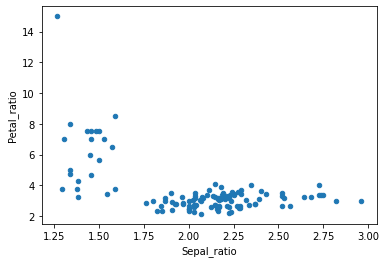

In [84]:
iris_sepal_petal_ratio.plot(x='Sepal_ratio', y='Petal_ratio',kind='scatter')

Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that’s been filtered to those rows with sepal length greater than 5. The filtering happens first, and then the ratio calculations. This is an example where we didn’t have a reference to the filtered DataFrame available.

The function signature for assign is simply **kwargs. The keys are the column names for the new fields, and the values are either a value to be inserted (for example, a Series or NumPy array), or a function of one argument to be called on the DataFrame. A copy of the original DataFrame is returned, with the new values inserted.

Changed in version 0.23.0.

Starting with Python 3.6 the order of **kwargs is preserved. This allows for dependent assignment, where an expression later in **kwargs can refer to a column created earlier in the same assign().

In [85]:
dfa = pd.DataFrame({"A": [1, 2, 3],"B": [4, 5, 6]})

In [86]:
dfa1 = dfa.assign(C=lambda x: x['A'] + x['B'],D=lambda x: x['A'] + x['C'])
dfa1

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


### Indexing / selection
The basics of indexing are as follows

In [87]:
dfa

,A,B
0,1,4
1,2,5
2,3,6


Select column  

In [88]:
dfa['A']

0    1
1    2
2    3
Name: A, dtype: int64

Select row by label



In [99]:
dfa.loc[1]

A    2
B    5
Name: 1, dtype: int64

Select row by integer location



In [102]:
dfa.iloc[0]

A    1
B    4
Name: 0, dtype: int64

Slice rows



In [109]:
dfa[1:3]

,A,B
1,2,5
2,3,6


### Data alignment and arithmetic
Data alignment between DataFrame objects automatically align on both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.

In [114]:
df1 = pd.DataFrame(np.random.randn(10,4), columns=['A','B','C','D'])
df2 = pd.DataFrame(np.random.randn(7,3), columns=['A','B','C'])
df1

,A,B,C,D
0,0.023302,-0.664309,0.117748,0.127947
1,0.589792,0.218243,1.094074,0.596683
2,0.570837,1.394867,-0.281309,-0.367804
3,-1.755884,-2.833245,-0.874769,2.132586
4,-0.315884,-1.018949,0.609264,0.364001
5,0.974742,0.508076,-0.928040,-0.983191
6,0.041037,-1.366912,0.630747,-0.475761
7,0.908199,0.021571,0.039133,2.043084
8,0.621297,0.910112,-0.273661,-1.882797
9,0.248416,0.489616,-0.397169,-0.274849


In [115]:
df2

,A,B,C
0,1.234445,-0.844415,-0.186978
1,0.875008,-0.649448,0.270994
2,-0.739831,-0.411271,1.710620
3,1.027688,1.141688,0.871819
4,0.531197,2.959469,1.537027
5,-0.597825,0.769555,-0.079009
6,0.239783,-0.291557,0.204124


In [116]:
df1 + df2

,A,B,C,D
0,1.257747,-1.508724,-0.069230,NaN
1,1.464800,-0.431205,1.365068,NaN
2,-0.168994,0.983595,1.429311,NaN
3,-0.728196,-1.691557,-0.002950,NaN
4,0.215313,1.940521,2.146291,NaN
5,0.376917,1.277631,-1.007049,NaN
6,0.280820,-1.658470,0.834871,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between DataFrame and Series, the default behavior is to align the Series index on the DataFrame columns, thus broadcasting row-wise. For example:

In [117]:
df1 - df1.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.566490,0.882552,0.976325,0.468736
2,0.547535,2.059176,-0.399057,-0.495751
3,-1.779185,-2.168936,-0.992517,2.004639
4,-0.339186,-0.354639,0.491516,0.236054
5,0.951440,1.172385,-1.045788,-1.111138
6,0.017735,-0.702603,0.512999,-0.603708
7,0.884897,0.685880,-0.078615,1.915136
8,0.597995,1.574421,-0.391409,-2.010745
9,0.225114,1.153925,-0.514918,-0.402796


In the special case of working with time series data, if the DataFrame index contains dates, the broadcasting will be column-wise:



In [121]:
index = pd.date_range('1/1/2020', periods=10)
df = pd.DataFrame(np.random.randn(10,5), index=index, columns=list('ABCDE'))
df

,A,B,C,D,E
2020-01-01,1.071103,3.122546,1.159341,-0.480340,0.360149
2020-01-02,1.421393,0.308797,-1.600536,0.661085,0.745944
2020-01-03,-0.386713,-0.947741,-1.786706,0.021918,-0.433242
2020-01-04,2.329479,-0.456870,-1.026709,-0.478223,1.507809
2020-01-05,0.472207,0.066829,-1.225953,1.291653,-0.011420
2020-01-06,-1.457493,0.173007,-0.133211,-0.826828,0.139788
2020-01-07,1.130603,0.142295,-2.322157,-0.691376,-1.073570
2020-01-08,-0.785580,0.507153,0.075371,-1.726672,-0.163631
2020-01-09,-0.732898,-0.544293,-1.167597,0.153669,0.386212
2020-01-10,0.712317,0.411855,1.414613,-0.535177,-0.646663


In [123]:
df - df.iloc[0]

,A,B,C,D,E
2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-02,0.350290,-2.813749,-2.759878,1.141425,0.385795
2020-01-03,-1.457816,-4.070287,-2.946047,0.502257,-0.793392
2020-01-04,1.258376,-3.579416,-2.186050,0.002117,1.147659
2020-01-05,-0.598896,-3.055717,-2.385294,1.771993,-0.371570
2020-01-06,-2.528596,-2.949539,-1.292553,-0.346488,-0.220361
2020-01-07,0.059500,-2.980251,-3.481498,-0.211036,-1.433719
2020-01-08,-1.856683,-2.615393,-1.083970,-1.246333,-0.523781
2020-01-09,-1.804002,-3.666839,-2.326938,0.634008,0.026062
2020-01-10,-0.358786,-2.710691,0.255271,-0.054838,-1.006812


In [125]:
df - df['A'] #is now deprecated and will be removed in a future release. The preferred way to replicate this behavior is

,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,A,B,C,D,E
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
df.sub(df['A'], axis=0)

,A,B,C,D,E
2020-01-01,0.0,2.051443,0.088238,-1.551443,-0.710954
2020-01-02,0.0,-1.112596,-3.021929,-0.760308,-0.675449
2020-01-03,0.0,-0.561028,-1.399993,0.408630,-0.046530
2020-01-04,0.0,-2.786349,-3.356188,-2.807702,-0.821670
2020-01-05,0.0,-0.405378,-1.698161,0.819446,-0.483628
2020-01-06,0.0,1.630501,1.324282,0.630665,1.597282
2020-01-07,0.0,-0.988308,-3.452760,-1.821979,-2.204173
2020-01-08,0.0,1.292733,0.860951,-0.941092,0.621949
2020-01-09,0.0,0.188605,-0.434699,0.886567,1.119110
2020-01-10,0.0,-0.300462,0.702295,-1.247495,-1.358980


Operations with scalars are just as you would expect:



In [129]:
df * 5 + 2 

,A,B,C,D,E
2020-01-01,7.355517,17.612731,7.796706,-0.401698,3.800747
2020-01-02,9.106965,3.543985,-6.002682,5.305425,5.729722
2020-01-03,0.066437,-2.738703,-6.933528,2.109589,-0.166211
2020-01-04,13.647395,-0.284350,-3.133544,-0.391114,9.539043
2020-01-05,4.361037,2.334147,-4.129766,8.458266,1.942898
2020-01-06,-5.287465,2.865037,1.333943,-2.134140,2.698942
2020-01-07,7.653016,2.711476,-9.610785,-1.456879,-3.367849
2020-01-08,-1.927900,4.535767,2.376857,-6.633362,1.181843
2020-01-09,-1.664492,-0.721465,-3.837985,2.768344,3.931058
2020-01-10,5.561587,4.059276,9.073063,-0.675886,-1.233313


In [130]:
1 / df

,A,B,C,D,E
2020-01-01,0.933617,0.320251,0.862559,-2.081861,2.776625
2020-01-02,0.703535,3.238372,-0.624791,1.512665,1.340583
2020-01-03,-2.585900,-1.055141,-0.559689,45.624959,-2.308178
2020-01-04,0.429281,-2.188806,-0.973986,-2.091075,0.663214
2020-01-05,2.117713,14.963488,-0.815692,0.774202,-87.561854
2020-01-06,-0.686110,5.780098,-7.506868,-1.209441,7.153669
2020-01-07,0.884484,7.027640,-0.430634,-1.446392,-0.931472
2020-01-08,-1.272945,1.971790,13.267622,-0.579149,-6.111297
2020-01-09,-1.364446,-1.837246,-0.856460,6.507504,2.589255
2020-01-10,1.403869,2.428038,0.706907,-1.868540,-1.546402


In [131]:
df ** 2

,A,B,C,D,E
2020-01-01,1.147262,9.750294,1.344072,0.230726,0.129708
2020-01-02,2.020358,0.095356,2.561716,0.437033,0.556433
2020-01-03,0.149547,0.898212,3.192317,0.000480,0.187699
2020-01-04,5.426472,0.208730,1.054131,0.228697,2.273487
2020-01-05,0.222980,0.004466,1.502961,1.668368,0.000130
2020-01-06,2.124286,0.029932,0.017745,0.683644,0.019541
2020-01-07,1.278263,0.020248,5.392413,0.478000,1.152552
2020-01-08,0.617136,0.257205,0.005681,2.981397,0.026775
2020-01-09,0.537140,0.296255,1.363283,0.023614,0.149159
2020-01-10,0.507396,0.169625,2.001129,0.286415,0.418172


Boolean operators work as well:



In [136]:
df1 = pd.DataFrame({'A':[1,0,1], 'B':[0,0,1]}, dtype=bool)
df2 = pd.DataFrame({'A':[0,0,1],'B':[1,1,0]}, dtype=bool)
df1

,A,B
0,True,False
1,False,False
2,True,True


In [137]:
df2

,A,B
0,False,True
1,False,True
2,True,False


In [138]:
df1 & df2

,A,B
0,False,False
1,False,False
2,True,False


In [139]:
df1 | df2

,A,B
0,True,True
1,False,True
2,True,True


In [140]:
- df1

,A,B
0,False,True
1,True,True
2,False,False


### Transposing
To transpose, access the T attribute (also the transpose function), similar to an ndarray:

In [141]:
index = pd.date_range('1/1/2020', periods=10)
df1 = pd.DataFrame(np.random.randn(10,3), index=index, columns=list("ABC"))
df1

,A,B,C
2020-01-01,0.125420,-0.545416,-1.435217
2020-01-02,-1.525406,-0.024492,0.458931
2020-01-03,-0.479816,0.645665,0.015221
2020-01-04,-0.774694,-0.388523,-1.366401
2020-01-05,2.483273,-1.154928,-0.206060
2020-01-06,0.322081,1.225239,1.884919
2020-01-07,-0.660816,0.155586,0.195883
2020-01-08,0.037571,-0.735628,1.353371
2020-01-09,1.977309,0.179611,0.792978
2020-01-10,-1.166945,0.236946,0.650676


In [144]:
df1.T

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10
A,0.125420,-1.525406,-0.479816,-0.774694,2.483273,0.322081,-0.660816,0.037571,1.977309,-1.166945
B,-0.545416,-0.024492,0.645665,-0.388523,-1.154928,1.225239,0.155586,-0.735628,0.179611,0.236946
C,-1.435217,0.458931,0.015221,-1.366401,-0.206060,1.884919,0.195883,1.353371,0.792978,0.650676


In [145]:
df1[:5].T

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05
A,0.125420,-1.525406,-0.479816,-0.774694,2.483273
B,-0.545416,-0.024492,0.645665,-0.388523,-1.154928
C,-1.435217,0.458931,0.015221,-1.366401,-0.206060


### DataFrame interoperability with NumPy functions
Elementwise NumPy ufuncs (log, exp, sqrt, …) and various other NumPy functions can be used with no issues on Series and DataFrame, assuming the data within are numeric:

In [146]:
np.exp(df1)

,A,B,C
2020-01-01,1.133625,0.579601,0.238064
2020-01-02,0.217533,0.975806,1.582381
2020-01-03,0.618897,1.907254,1.015338
2020-01-04,0.460845,0.678058,0.255023
2020-01-05,11.980412,0.315080,0.813785
2020-01-06,1.379996,3.404980,6.585822
2020-01-07,0.516430,1.168342,1.216384
2020-01-08,1.038286,0.479204,3.870450
2020-01-09,7.223282,1.196752,2.209968
2020-01-10,0.311316,1.267372,1.916837


In [147]:
np.asarray(df1)

array([[ 0.1254201 , -0.54541618, -1.43521679],
       [-1.52540555, -0.0244917 ,  0.45893085],
       [-0.47981631,  0.64566451,  0.01522131],
       [-0.7746943 , -0.38852258, -1.36640071],
       [ 2.48327298, -1.15492802, -0.20605966],
       [ 0.32208053,  1.2252391 ,  1.88491919],
       [-0.66081578,  0.15558558,  0.19588272],
       [ 0.03757112, -0.73562836,  1.35337075],
       [ 1.97730937,  0.17961102,  0.79297794],
       [-1.16694544,  0.23694558,  0.65067643]])

DataFrame is not intended to be a drop-in replacement for ndarray as its indexing semantics and data model are quite different in places from an n-dimensional array.

Series implements __array_ufunc__, which allows it to work with NumPy’s universal functions.

The ufunc is applied to the underlying array in a Series.

In [149]:
ser = pd.Series([1,2,3,4], dtype=int)
ser

0    1
1    2
2    3
3    4
dtype: int64

In [150]:
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

Changed in version 0.25.0: When multiple Series are passed to a ufunc, they are aligned before performing the operation.

Like other parts of the library, pandas will automatically align labeled inputs as part of a ufunc with multiple inputs. For example, using numpy.remainder() on two Series with differently ordered labels will align before the operation.

In [159]:
ser1 = pd.DataFrame([1,2,3], index=list('ABC'))
ser2 = pd.DataFrame([5,6,7], index=list("ACB"))

In [160]:
ser1

,0
A,1
B,2
C,3


In [161]:
ser2

,0
A,5
C,6
B,7


In [162]:
np.remainder(ser1, ser2)

,0
A,1
B,2
C,3


### Console display
Very large DataFrames will be truncated to display them in the console. You can also get a summary using info().

In [163]:
ls

data/  Lect_1_Pandas.ipynb  Pandas_Series.ipynb


In [164]:
cd data/

/home/nilesh/Desktop/Neil_Novi/DataProcessing/Pandas/data


In [165]:
ls

attention.csv  exercise.csv  fmri.csv  planets.csv  titanic.csv
dots.csv       flights.csv   iris.csv  tips.csv


In [167]:
data = pd.read_csv('/home/nilesh/Desktop/Neil_Novi/DataProcessing/Pandas/data/titanic.csv')
print(data)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [169]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


However, using to_string will return a string representation of the DataFrame in tabular form, though it won’t always fit the console width:

In [172]:
print(data.iloc[:5,:].to_string())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False    C  Southampton   yes  False
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True  NaN  Southampton    no   True


Wide DataFrames will be printed across multiple rows by default:



In [179]:
pd.DataFrame(np.random.randn(5, 30))

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.042507,0.575759,1.163394,0.138809,0.614828,0.875217,1.308658,-0.618791,1.118781,-0.387918,...,1.358988,-1.589375,-1.167715,1.026273,0.615898,1.124745,-1.671754,0.720183,-0.953478,1.130640
1,1.190645,-0.594907,-0.112209,1.131694,-0.880555,-0.169966,0.947611,1.285858,0.247863,-1.176661,...,0.409977,-0.192021,0.454083,-0.219414,1.612236,0.137771,-0.843276,-0.910517,-0.355154,-0.791501
2,0.924467,-0.177380,0.247123,0.732090,0.866963,-1.164224,0.883533,0.902788,-0.061077,-1.264464,...,-1.178694,0.079904,-0.979264,1.714336,-0.529672,0.519523,2.502260,0.040600,0.685567,0.143433
3,2.748341,-0.324088,0.675306,0.597272,-0.609058,0.142765,0.194704,-0.839854,0.656238,0.513381,...,-0.255661,-0.315011,1.504776,1.630807,-0.133326,0.239569,1.770886,-1.808680,-0.323951,-1.129037
4,1.279060,0.009519,-1.937476,0.204154,-0.525828,-1.011624,0.381765,0.131454,0.970674,-0.050769,...,-0.544976,-0.223223,-0.897231,-1.533852,0.464176,1.368050,-0.337608,-1.921201,-1.517319,-0.828468


You can change how much to print on a single row by setting the display.width option:



In [180]:
pd.set_option('display.width', 30)

In [181]:
pd.DataFrame(np.random.randn(5,30))

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.594460,-1.100911,0.433651,0.360731,-1.149161,-0.447079,2.351833,0.329523,-0.902638,0.793164,...,-0.775168,-0.169866,0.265001,-0.788656,0.234895,0.268272,0.503804,-2.572972,1.441623,0.995460
1,-0.267266,1.530928,-1.429618,0.664879,-0.618290,-0.704343,-0.238224,1.949814,-0.307973,-0.811593,...,0.368936,0.917075,0.898266,0.391292,-1.466149,-1.628513,-0.988086,0.313687,-0.691556,-0.304307
2,-0.461437,-0.408160,-0.214733,0.620988,1.580446,-1.561034,-0.643515,0.648937,-0.594850,1.122754,...,1.236337,1.075577,0.576703,-2.324204,0.115743,2.013297,0.026806,-0.416044,1.618482,-0.589692
3,0.275782,0.961306,0.266630,1.604810,0.575625,0.972729,0.450755,0.213072,1.122294,0.320213,...,-0.970241,-0.671806,-1.190933,0.605484,0.561786,-1.903977,-0.222384,0.342092,0.378463,-0.647616
4,1.439056,0.540297,-0.125280,-0.072104,-0.038276,-0.386919,1.214078,-0.418108,-0.272703,-0.125786,...,-0.863028,-0.613675,0.824796,-0.189121,0.598578,-0.369134,0.218304,0.406809,0.577275,0.724280


You can adjust the max width of the individual columns by setting display.max_colwidth



In [182]:
datafile = {'filename': ['filename_01', 'filename_02'],
             'path': ["media/user_name/storage/folder_01/filename_01",
            "media/user_name/storage/folder_02/filename_02"]}
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


In [183]:
pd.set_option('display.max_colwidth', 10)

In [184]:
pd.DataFrame(datafile)

,filename,path
0,filena...,media/...
1,filena...,media/...


### DataFrame column attribute access and IPython completion
If a DataFrame column label is a valid Python variable name, the column can be accessed like an attribute:

In [185]:
df = pd.DataFrame({'A':[1,2,3,4], 'B':[5,6,7,8]})

In [186]:
df

,A,B
0,1,5
1,2,6
2,3,7
3,4,8


In [187]:
df.A

0    1
1    2
2    3
3    4
Name: A, dtype: int64

In [188]:
df.B

0    5
1    6
2    7
3    8
Name: B, dtype: int64